# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

*INTEGRANTES*

**Integrante 01**: Rafael Mori Pinheiro

**RA**: 813851

**Integrante 02**: Pedro Enrico Barchi Nogueira

**RA**: 813099


# Detecção de Doenças Cardiológicas em Pacientes de até 19 Anos via Aprendizado de Máquina

## Sumário
1. [Introdução](#introducao)
2. [Inicialização e Preparação do Ambiente](#inicializacao-e-preparacao-do-ambiente)
3. [Carregamento dos Dados](#carregamento-dos-dados)
4. [Análise Exploratória](#analise-exploratoria)
5. [Pré-processamento dos Dados](#pre-processamento-dos-dados)
6. [Treinamento dos Modelos](#treinamento-dos-modelos)
7. [Avaliação dos Resultados](#avaliacao-dos-resultados)
8. [Escolha do Modelo Final e Geração da Submissão](#escolha-do-modelo-final-e-geracao-da-submissao)

---

## <a id="introducao"></a>Introdução 
Neste projeto, exploramos e processamos dados médicos de uma amostra de aproximadamente 18 mil paciente e assim desenvolvemos modelos de aprendizado de máquina para **detectar cardiopatias** pediátricas com base em tais dados clínicos. O objetivo é **auxiliar na identificação precoce** de doenças cardíacas, melhorando o tratamento e a qualidade de vida dos pacientes.

---
## <a id="inicializacao-e-preparacao-do-ambiente"></a>Inicialização e Preparação do Ambiente
Nesta seção, inicializamos o ambiente de trabalho importando as bibliotecas necessárias e carregando os scripts desenvolvidos para as diferentes etapas do projeto. 

### Instalando pacotes úteis para o projeto

In [ ]:

# Pacotes para Manipulação e Visualização de Dados
%pip install pandas numpy matplotlib seaborn plotly missingno

# Pacotes para Pré-processamento, Modelagem e Avaliação
%pip install scikit-learn 

# Pacote para Salvamento e Carregamento de Modelos
%pip install joblib

### Importações

In [8]:
# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Sistema de Arquivos e Configurações
import os
import warnings
from IPython.display import display

# Auxiliares para modelos
from sklearn.model_selection import train_test_split, cross_val_score

# SCRIPTS DO PROJETO

# Análise exploratória
from scripts.analise_exploratoria import visao_geral, verificar_integridade, plot_missing_values, plot_missing_heatmap, plot_boxplots, analise_estatistica, plot_distribuicoes, plot_violin, plot_pairplot, segmentar_por_faixa_etaria, comparar_sopro, histograma_geral, exibir_heatmap_correlacao, boxplots_unicos, plot_valores_categoricos, exibir_inconsistencias

# Pré processamento
from scripts.preprocessamento import pipeline_pre_processamento

# Modelos
from scripts.experimentos import criar_modelos, treinar_modelo

# Análise dos resultados
from scripts.analise_resultados import avaliar_modelo, validar_modelo_cv, plot_roc_curves, plot_learning_curve, plot_confusion_matrix, plot_cv_boxplot

---
## <a id="carregamento-dos-dados"></a>Carregamento dos Dados
Aqui, carregamos os diferentes conjuntos de dados fornecidos (`RHP_data.csv`, `train.csv`, `test.csv` e `sample_submission.csv`) utilizando a biblioteca `Pandas`. A integração dos dados de treino e teste com os registros clínicos do `RHP_data.csv` é essencial para preparar os conjuntos de dados completos que serão utilizados nas etapas subsequentes.

Obs: Consideramos que a pasta de dados base está no **mesmo diretório do jupyter notebook**, no descumprimento deste requisito o carregamento da base de dados falhará.


In [9]:
# Caminho para os dados
path_data = './data/'

# Carregamento dos datasets necessários
df_rhp = pd.read_csv(path_data + 'RHP_data.csv', encoding='utf-8', sep=',')
df_train_labels = pd.read_csv(path_data + 'train.csv', encoding='utf-8')
df_test_ids = pd.read_csv(path_data + 'test.csv', encoding='utf-8')
df_sample_submission = pd.read_csv(path_data + 'sample_submission.csv', encoding='utf-8')

# Integração dos dados de treino com os dados de registro clínico
df_treino_completo = df_train_labels.merge(df_rhp, how='inner', on='Id')

# Integração dos dados de teste com os dados de registro clínico
df_teste_completo = df_test_ids.merge(df_rhp, how='left', on='Id')

---
## <a id="analise-exploratoria"></a>Análise Exploratória
Nesta seção, realizamos uma Análise Exploratória dos Dados para entender melhor as características dos dados, identificar possíveis problemas como valores ausentes e outliers além de visualizar a distribuição das classes. A EDA é será de suma importância para orientar as etapas de pré-processamento e seleção de features, uma vez que conhecendo os dados e identificando as correções a serem feitas, poderemos garantir que os dados sejam devidamente tratados para o treinamento dos modelos de aprendizado de máquina.

### Principais Análises Realizadas

- Visão geral do dataset
- Verificação da integridade
- Visualização de valores faltantes
- Análise da distribuição de variáveis numéricas
- Análise Estatísitca Descritiva
- Visualização das relações entre variáveis
- Segmentação por faixa etária
- Comparação de grupos categóricos

Dado isso, criamos diretórios para salvar os plots e reports gerados a fim de termos uma visualização mais adequada, além de plotar certos gráficos no próprio jupyter notebook para um visão mais rápida.

In [3]:
# Antes de realizar os plots vamos para algumas conversões para viabilizá-los
colunas_numericas = ["Peso", "Altura", "IMC", "IDADE", "PA SISTOLICA", "PA DIASTOLICA"]

for col in colunas_numericas:
    df_rhp[col] = pd.to_numeric(df_rhp[col], errors='coerce')

### Criação de plots

=== Primeiras Linhas do DataFrame ===



=== Dimensões do DataFrame ===
Linhas: 17873, Colunas: 21

=== Informações do DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17873 entries, 0 to 17872
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             17873 non-null  int64   
 1   Peso           17555 non-null  float64 
 2   Altura         17873 non-null  int64   
 3   IMC            13146 non-null  float64 
 4   Atendimento    16890 non-null  object  
 5   DN             16497 non-null  object  
 6   IDADE          16377 non-null  float64 
 7   Convenio       12569 non-null  object  
 8   PULSOS         16675 non-null  object  
 9   PA SISTOLICA   10143 non-null  float64 
 10  PA DIASTOLICA  10133 non-null  float64 
 11  PPA            17656 non-null  object  
 12  B2             16694 non-null  object  
 13  SOPRO          16706 non-null  object  
 14  FC             15832 non-null  object  
 15  HDA 1          12459 non-nul

<Figure size 1200x600 with 0 Axes>

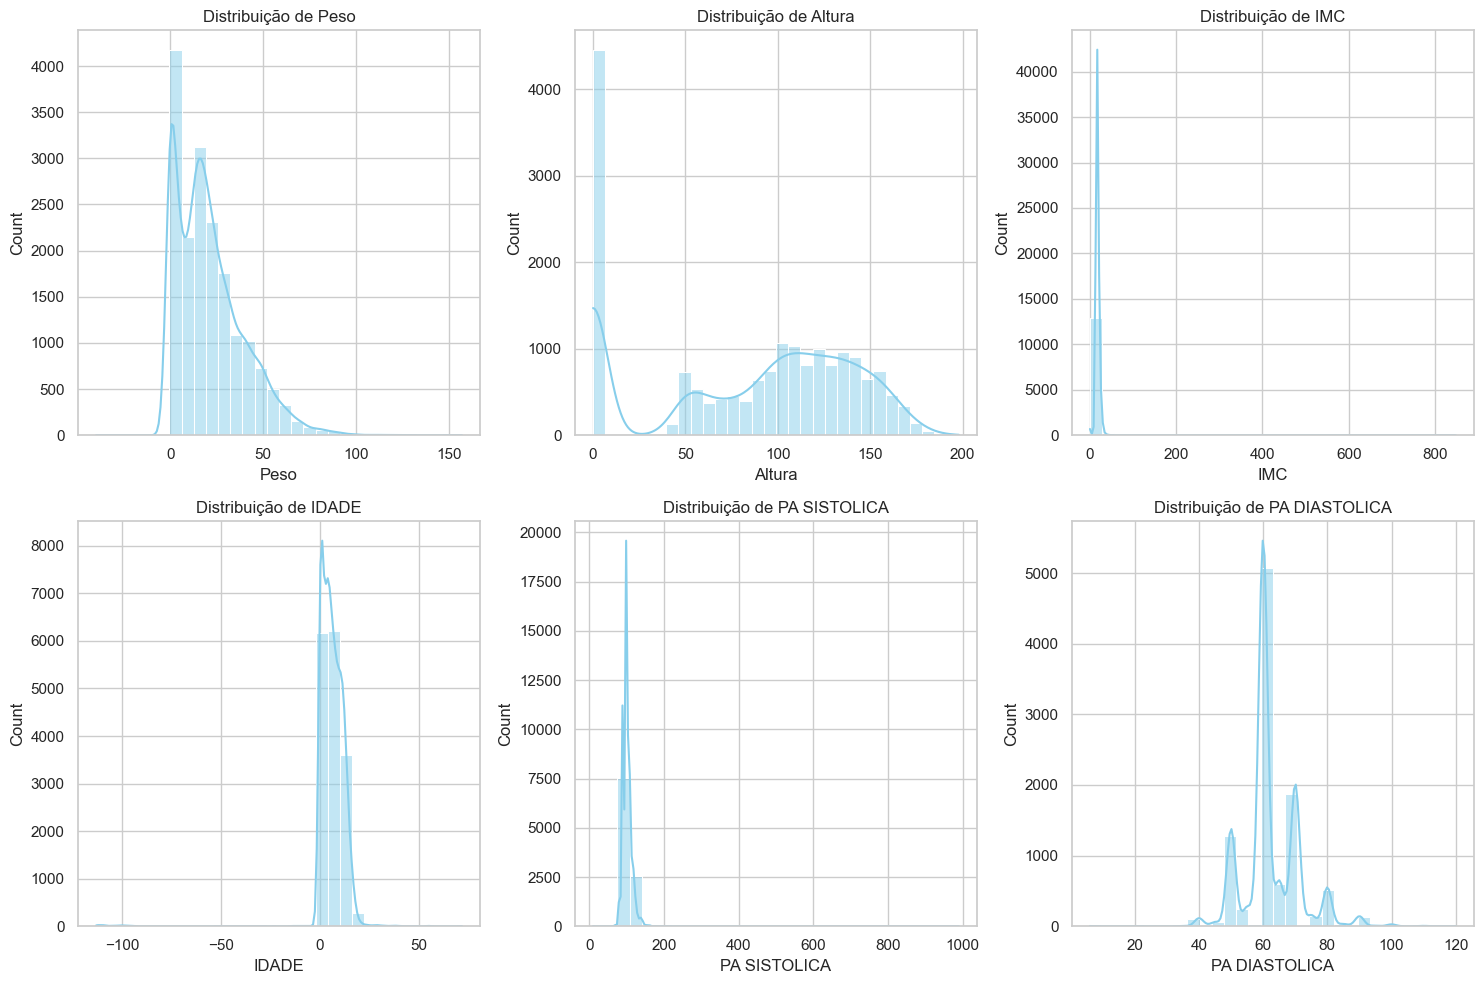

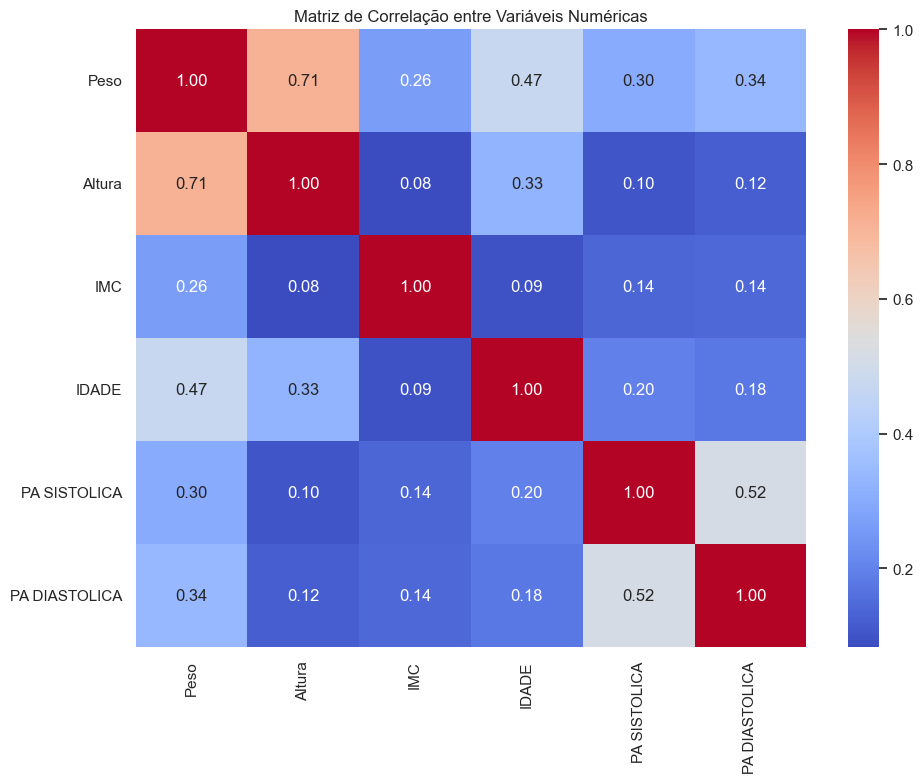

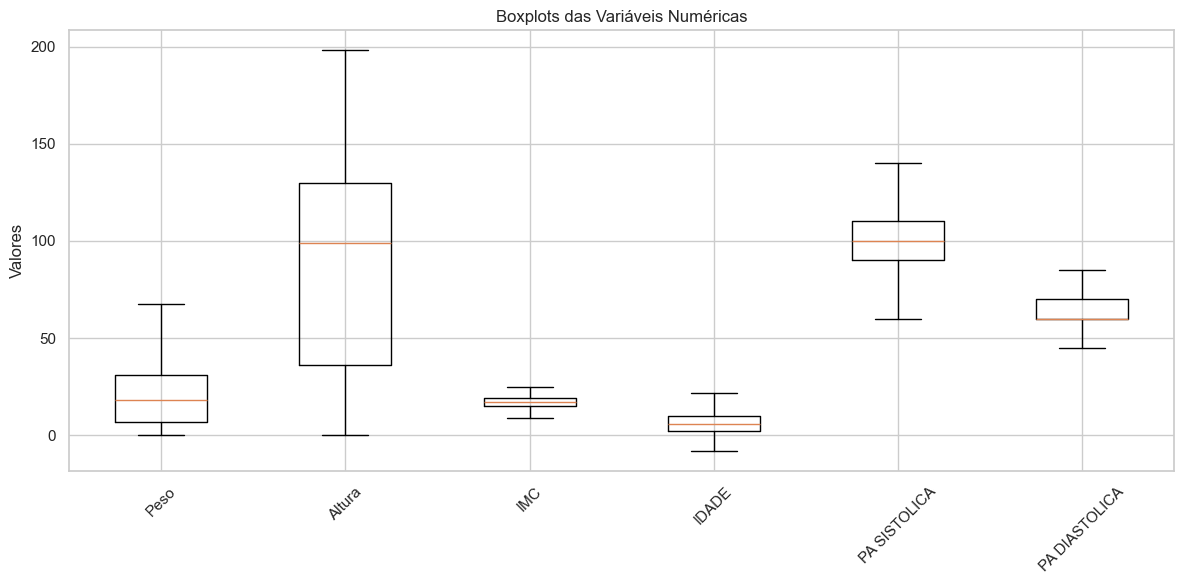

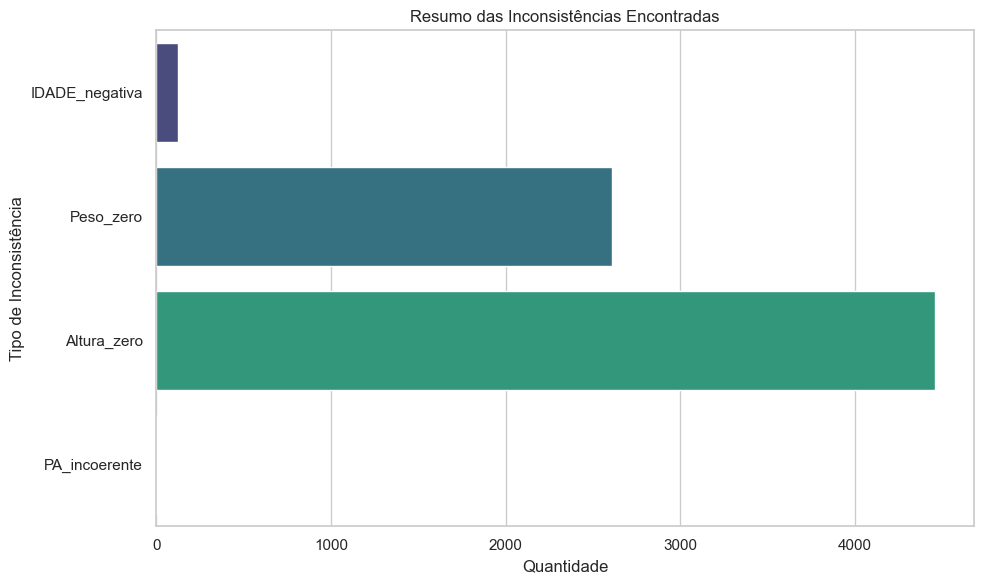

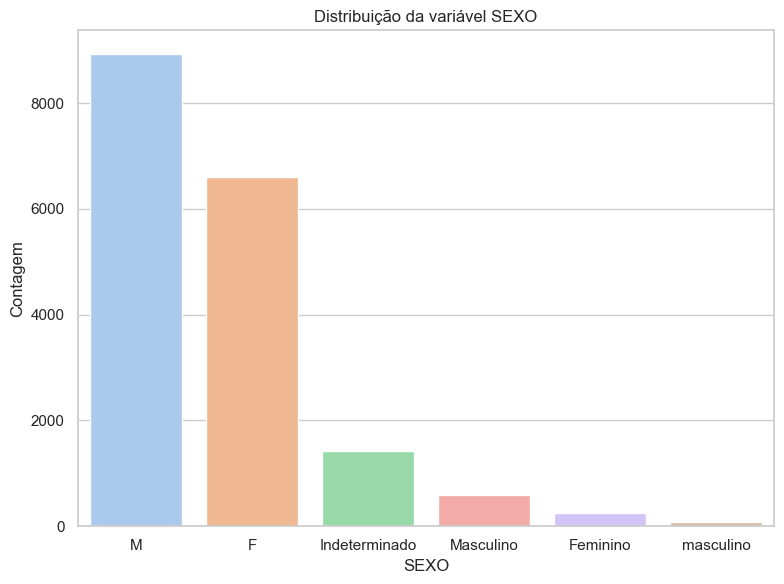

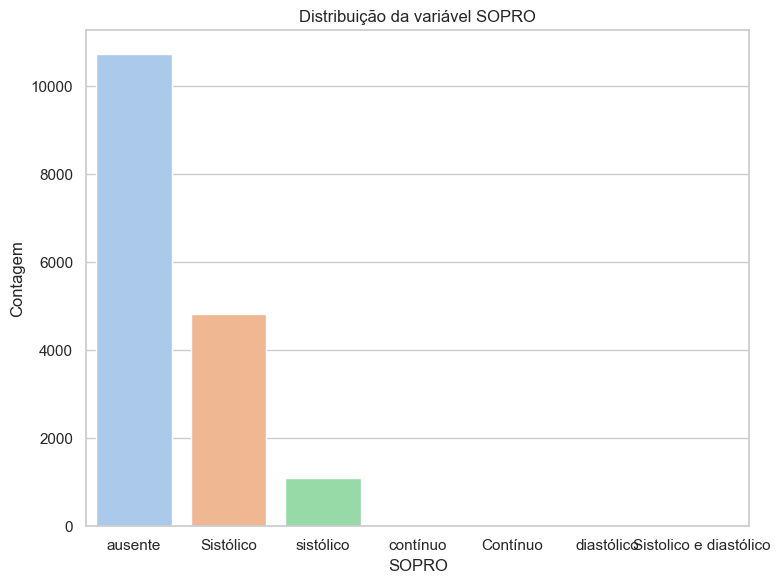

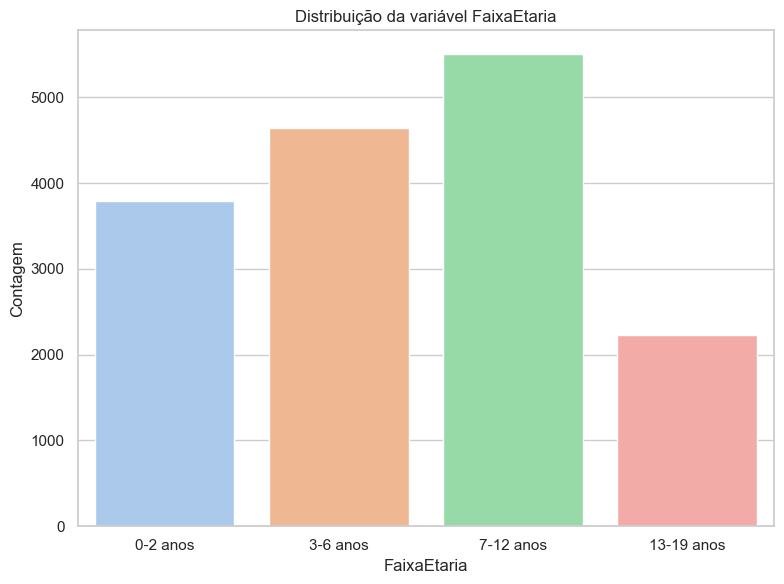


Análise Exploratória Concluída. Os gráficos foram salvos na pasta 'plots/'.


In [6]:
# Criação de diretórios para salvar plots
if not os.path.exists('plots'):
    os.makedirs('plots')

# Criação de diretórios para salvar reports
if not os.path.exists('reports'):
    os.makedirs('reports')

# Configuração do tema dos gráficos
sns.set_theme(style='whitegrid')

# Supressão dos avisos
warnings.filterwarnings('ignore')  

# Atribuição do dataset que será analisado
df = df_rhp

# Exibição de informações gerais do dataset e estatísticas descritivas
visao_geral(df)

# Verificação de valores incoerentes e incongruentes nos dados
inconsistencias = verificar_integridade(df)

# Visualização de valores faltantes
plot_missing_values(df)
plot_missing_heatmap(df)

# Definição das colunas númericas para análise boxplot
colunas_numericas = ["Peso", "Altura", "IMC", "IDADE", "PA SISTOLICA", "PA DIASTOLICA"]
# Identificação de outliers pelos boxplots
plot_boxplots(df, colunas_numericas)

# Análise estatística exibindo assimetria, curtose e matriz de correlação para dados numéricos
analise_estatistica(df, colunas_numericas)

# Visualização da distribuição das variáveis numéricas com hisogramas e KDE plots
plot_distribuicoes(df, colunas_numericas)

# Gráficos de violino para comparar distribuições por sexo
plot_violin(df, colunas_numericas, 'SEXO')

# Gráfico para identificação de correlação de variáveis com relação à sopro
plot_pairplot(df, colunas_numericas, 'SOPRO')

# Comparação entre direntes tipos de sopro do dataset
comparar_sopro(df, colunas_numericas)

# Segmentação dos dados por faixa etária
segmentar_por_faixa_etaria(df, colunas_numericas)

# Histograma geral dos atributos
histograma_geral(df, colunas_numericas)

# Plot Correlação
exibir_heatmap_correlacao(df, colunas_numericas)

# Plot dos boxplots agrupados
boxplots_unicos(df, colunas_numericas)

# Plot de inconsistências
exibir_inconsistencias(inconsistencias)

# Gráficos de variáveis categóricas
plot_valores_categoricos(df, coluna="SEXO")
plot_valores_categoricos(df, coluna="SOPRO")

if 'FaixaEtaria' in df.columns:
    plot_valores_categoricos(df, coluna="FaixaEtaria")

print("\nAnálise Exploratória Concluída. Os gráficos foram salvos na pasta 'plots/'.")

### Principais resultados obtidos

A análise exploratória de dados permitiu a identificação de inconsistências bem como relações entre os dados explorados. Detectamos valores impossíveis e incongruentes para algumas variáveis, conseguimos visualizar a distribuição de variáveis seguindo padrões esperados, além da identificação de diferenças fisiológicas interessantes na segmentação por sexo e presença de sopro. Podemos assim listar alguns dos principais achados:

- Inconsistências nos dados: detectados valores anômalos como idades negativas, valores de peso e altura zerados, medidas que não podem refletir a realidade de pressão arterial além de muitos valores faltantes principalmente em IMC, Convênio, PA Sistólica e Diastólica, HDA1 e HDA2 e Motivo 2, sendo HDA2 o que mais apresenta valores faltantes.

- Distribuição das variáveis: padrão de crescimento progressivo de peso e altura conforme a idade identificado, mas com alta variação no IMC e PA.

- Diferenças entre grupos: identificação de variações fisiologicas enre sexos e padrões divergentes em paciente de acordo com a presença ou não de sopro.

- Correlações: associação maior entre peso e altura e média ou baixa correlação entre as demais variáveis.

Com esses principais achados e uma análise concreta de tudo que geramos nessa etapa poderemos nos guiar no pré-processamento dos dados a fim de obtermos dados mais limpos e adequados para o treinamento dos modelos.

---
## <a id="pre-processamento-dos-dados"></a>Pré-processamento dos Dados

O pré-processamento foi estruturado com a finalidade de preparar os dados de teste e treinamento, limpando e tratando os dados clínicos sensíveis, para a construção e treinamento dos modelos de aprendizado de máquina em seguida. Buscamos garantir que os dados ficassem devidamente limpos, removendo inconsistências e valores absurdos, além de estruturar e criar features que permitissem extrair o máximo de valor preditivo. As principais ações realizadas incluíram:

- Conversão de tipos
- Tratamento de inconsistências relativas a cada atributo
- Imputação de valores faltantes
- Criação de features
- Codificação de categorias por One Hot
- Tratamento de outliers
- Escalonamento de colunas numéricas

In [10]:
print("=== PRE-PROCESSANDO TREINO ===\n")

# Aplicação do pré-processamento para os dados de treino
df_pre_train, scaler_treino = pipeline_pre_processamento(
    df_treino_completo,
    fit_scaler=True,   # Ajusta o scaler
    scaler=None        # Pois ainda não temos um scaler treinado
)

# Remover linhas sem classe
df_pre_train = df_pre_train.dropna(subset=['CLASSE'])

# Mapeamento da classe para [0,1]
df_pre_train['CLASSE'] = df_pre_train['CLASSE'].map({'Normal': 0, 'Normais': 0, 'Anormal': 1})

# Retirar linhas que ainda estejam NaN na classe
df_pre_train = df_pre_train.dropna(subset=['CLASSE'])

# Criando X e y
y = df_pre_train['CLASSE']
X = df_pre_train.drop(columns=['CLASSE'])

print("Shape após pré-processar treino:", X.shape, y.shape)

# Pré-processamento do teste
df_pre_test, _ = pipeline_pre_processamento(
    df_teste_completo,
    fit_scaler=False, 
    scaler=scaler_treino
)

# Nem sempre existe 'CLASSE' no conjunto de teste, se existir, removemos
X_test = df_pre_test.drop(columns=['CLASSE'], errors='ignore')
# Precisamos reordenar colunas de X_test para que batam com X
X_test = X_test.reindex(columns=X.columns, fill_value=0)

print("Shape após pré-processar teste:", X_test.shape)

=== PRE-PROCESSANDO TREINO ===

=== Iniciando Pipeline de Pre-Processamento ===
[INFO] (converter_tipos) Convertendo colunas numéricas...
[INFO] Coluna 'Peso' convertida para numérico
[INFO] Coluna 'Altura' convertida para numérico
[INFO] Coluna 'IMC' convertida para numérico
[INFO] Coluna 'IDADE' convertida para numérico
[INFO] Coluna 'PA SISTOLICA' convertida para numérico
[INFO] Coluna 'PA DIASTOLICA' convertida para numérico
[INFO] Coluna 'FC' convertida para numérico
[INFO] (tratar_inconsistencias) Ajustando inconsistências...
[INFO] Corrigidos 122 valores negativos de 'IDADE' via mediana 5.77
[INFO] Corrigidos 80 valores de 'IDADE' > 20 via mediana 5.77
[INFO] Corrigidos 3803 valores de 'Altura' < 25cm via mediana 114.0
[INFO] Corrigidos 2312 valores de 'Peso' < 2kg via mediana 21.0
[INFO] Corrigidos 3 valores de 'PA SISTOLICA' < 70 via mediana 100.0
[INFO] Corrigidos 1 valores de 'PA SISTOLICA' > 200 via mediana 100.0
[INFO] Corrigidos 6 valores de 'PA DIASTOLICA' < 40 via media

---
## <a id="treinamento-dos-modelos"></a>Treinamento dos Modelos

Após a conclusão da etapa de pré-processamento, os dados estão devidamente tratados e estruturados. Com isso, podemos prosseguir para a fase de treinamento dos modelos preditivos.
O objetivo dessa etapa é treinar diferentes modelos de aprendizado de máquina e selecionar o modelo que apresenter o **melhor desempenho na detecção de patologias cardíacas em crianças**.

### Modelos Avaliados

Os modelos escolhidos incluem:
- k-NN
- Naive Bayes
- Regressão Logística
- Redes Neurais Artificiais (MLP)
- SVM
- Random Forest
- Gradient Boosting
- Ada Boost

### Divisão dos Dados

Para realizar o treinamento e testagem dos modelos de forma adequada, tendo como objetivo reduzir seu viés e evitar o overfitting, separamos os dados de forma a deixar 80% para treinamento e 20% dos dados para validação.

### Avaliação de Validação Cruzada

Logo em seguida do treinamento de cada modelo, foi feita uma análise a fim de obter diferentes métricas relativas a ele para armazenamento dos resultados e posterior análise de desempenho além de uma validação cruzada com 5 folds para medir a estabilidade e capacidade de generalização do modelo. Para isso utilizamos as abordagens de calcular métricas como acurácia, precisão, recall, F1-score e auc-roc para cada um dos modelos treinados.

In [11]:
# 20% dos dados para validação
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)

print("Tamanho do Treino (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamanho da Validação (X_val, y_val):", X_val.shape, y_val.shape)

# Criação dos modelos para o treinamento
modelos = criar_modelos()
modelos_treinados = {}
resultados = {}

# Treinar e avaliar cada modelo
for nome_modelo, model in modelos.items():
    print(f"\n--- Treinando o modelo: {nome_modelo} ---")
    
    # Treinamento do modelo
    model_treinado = treinar_modelo(model, X_train, y_train)

    # Dicionário para posterior análise de resultados
    modelos_treinados[nome_modelo] = model_treinado
    
    # Avaliação no conjunto de validação
    metricas_val = avaliar_modelo(model_treinado, X_val, y_val)

    print(f"[Holdout Validation] {nome_modelo}: "
          f"Acurácia={metricas_val['accuracy']:.4f}, "
          f"F1={metricas_val['f1']:.4f}, "
          f"Precisão={metricas_val['precision']:.4f}, "
          f"Recall={metricas_val['recall']:.4f}, "
          f"AUC={metricas_val['auc']:.4f}")
    
    # Realização validação cruzada
    auc_cv = validar_modelo_cv(model_treinado, X_train, y_train, cv=5, scoring='roc_auc')
    
    # Armazenamento de resultados
    resultados[nome_modelo] = {
        'acc_val':   metricas_val['accuracy'],
        'f1_val':    metricas_val['f1'],
        'precision': metricas_val['precision'],
        'recall':    metricas_val['recall'],
        'auc_val':   metricas_val['auc'],
        'auc_cv':    auc_cv
    }

# Exibição dos resultados comparativos
print("\n=== Resumo Final (Holdout x CrossVal) ===")
for nome_modelo, metricas in resultados.items():
    print(f"{nome_modelo}: "
          f"AUC(Holdout)={metricas['auc_val']:.4f} | "
          f"AUC(Train_CV)={metricas['auc_cv']:.4f}")

Tamanho do Treino (X_train, y_train): (10847, 78) (10847,)
Tamanho da Validação (X_val, y_val): (2712, 78) (2712,)

--- Treinando o modelo: KNN ---
[INFO] KNeighborsClassifier - Melhores hiperparâmetros: {'n_neighbors': 9, 'weights': 'distance'}
[Holdout Validation] KNN: Acurácia=0.8824, F1=0.8396, Precisão=0.9227, Recall=0.7703, AUC=0.9198

--- Treinando o modelo: NaiveBayes ---
[INFO] GaussianNB - Melhores hiperparâmetros: {'var_smoothing': 1e-06}
[Holdout Validation] NaiveBayes: Acurácia=0.9089, F1=0.8832, Precisão=0.9059, Recall=0.8616, AUC=0.9177

--- Treinando o modelo: LogisticRegression ---
[INFO] LogisticRegression - Melhores hiperparâmetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
[Holdout Validation] LogisticRegression: Acurácia=0.9310, F1=0.9088, Precisão=0.9638, Recall=0.8598, AUC=0.9441

--- Treinando o modelo: MLP ---
[INFO] MLPClassifier - Melhores hiperparâmetros: {'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
[Holdout Validation] MLP:

---
## <a id="avaliacao-dos-resultados"></a>Avaliação dos Resultados

Com o treino e a validação cruzada dos modelos feitas, os resultados forma armazenados no dicionário **resultados** e **modelos_treinados**. Passamos então para a fase de analisar o que foi gerado e como os resultados mostrados nos guiam a selecionar um modelo. 

Nessa etapa temos como objetivo fazer a comparação dos desempenhos dos diferentes modelos treinados, com base nas métricas de acurácia, precisão, recall, F1-Score e AUC-ROC, identificando aquele que possui o melhor equilíbrio entre as métricas mais relevantes para detecção de patologias cardíacas em crianças. Em nosso contexto, a **AUC-ROC** tem um destaque maior, uma vez que ela reflete a capacidade do modelo em classificar corretamente os pacientes que possuem a condição, minimizando assim os falsos negativos e os que não possuem, minimizando os falsos positivos, além de ser a métrica principal para a competição deste projeto.

Para uma analisarmos de forma mais clara e rica utilizamos os recursos de geração de **gráficos de barras** e uma **tabela de resumo** além de **plots**, que detalharão os resultados obtidos.

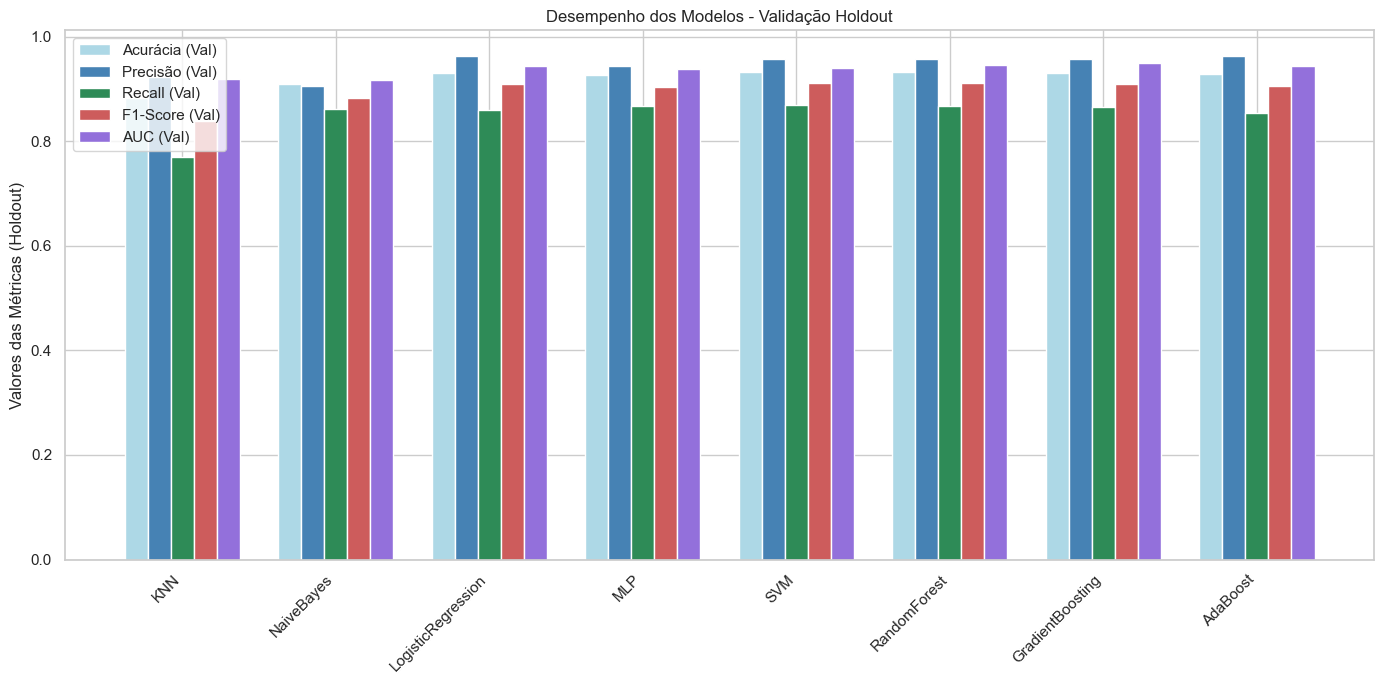


Tabela Resumo - Desempenho na Validação (Holdout):


,Modelo,Acurácia(Val),Precisão(Val),Recall(Val),F1-Score(Val),AUC(Val)
0,KNN,0.8824,0.9227,0.7703,0.8396,0.9198
1,NaiveBayes,0.9089,0.9059,0.8616,0.8832,0.9177
2,LogisticRegression,0.9310,0.9638,0.8598,0.9088,0.9441
3,MLP,0.9266,0.9447,0.8672,0.9043,0.9390
4,SVM,0.9322,0.9573,0.8690,0.9110,0.9400
5,RandomForest,0.9322,0.9582,0.8681,0.9109,0.9466
6,GradientBoosting,0.9310,0.9572,0.8662,0.9094,0.9500
7,AdaBoost,0.9285,0.9626,0.8542,0.9052,0.9440


In [12]:
modelos_nome = list(resultados.keys())
modelos_list = list(modelos_treinados.values())

# Obtenção dos valores das métricas
acc_holdout = [resultados[m]['acc_val'] for m in modelos_nome]
prec_holdout = [resultados[m]['precision'] for m in modelos_nome]
rec_holdout  = [resultados[m]['recall'] for m in modelos_nome]
f1_holdout   = [resultados[m]['f1_val'] for m in modelos_nome]
auc_holdout  = [resultados[m]['auc_val'] for m in modelos_nome]

# Gráfico de barras das métricas
x = np.arange(len(modelos_nome))
width = 0.15

fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(x - 2*width, acc_holdout, width, label='Acurácia (Val)', color='lightblue')
ax.bar(x - width,  prec_holdout, width, label='Precisão (Val)', color='steelblue')
ax.bar(x,          rec_holdout,  width, label='Recall (Val)',   color='seagreen')
ax.bar(x + width,  f1_holdout,   width, label='F1-Score (Val)', color='indianred')
ax.bar(x + 2*width,auc_holdout,  width, label='AUC (Val)',       color='mediumpurple')

ax.set_ylabel('Valores das Métricas (Holdout)')
ax.set_title('Desempenho dos Modelos - Validação Holdout')
ax.set_xticks(x)
ax.set_xticklabels(modelos_nome, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

# Tabela de Resumo
dados_tabela = {
    'Modelo': modelos_nome,
    'Acurácia(Val)': [f"{val:.4f}" for val in acc_holdout],
    'Precisão(Val)': [f"{val:.4f}" for val in prec_holdout],
    'Recall(Val)':   [f"{val:.4f}" for val in rec_holdout],
    'F1-Score(Val)': [f"{val:.4f}" for val in f1_holdout],
    'AUC(Val)':      [f"{val:.4f}" for val in auc_holdout]
}
tabela_resumo = pd.DataFrame(dados_tabela)
print("\nTabela Resumo - Desempenho na Validação (Holdout):")
display(tabela_resumo)


Melhor modelo na Validação (AUC): GradientBoosting


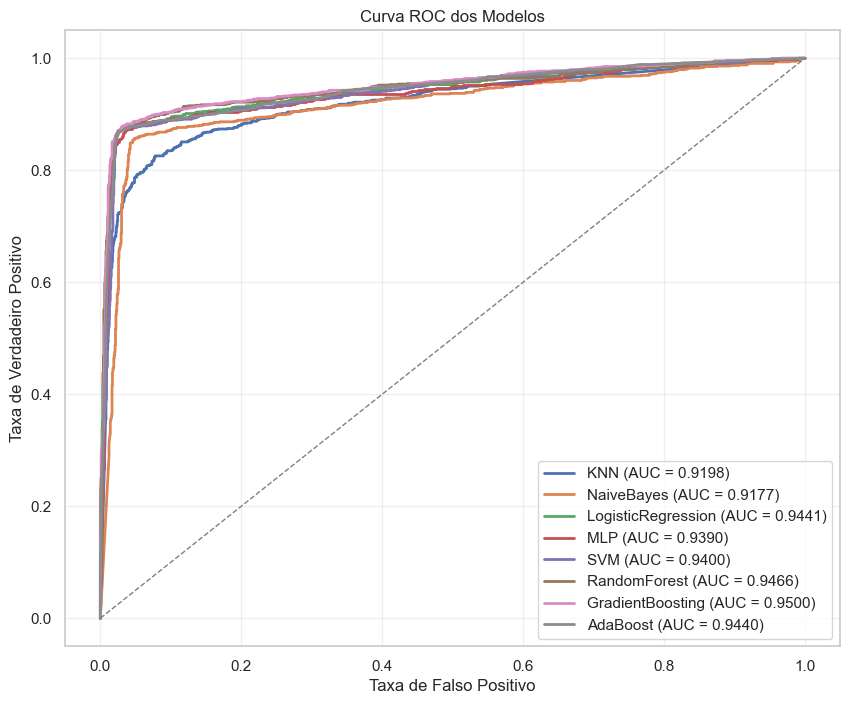

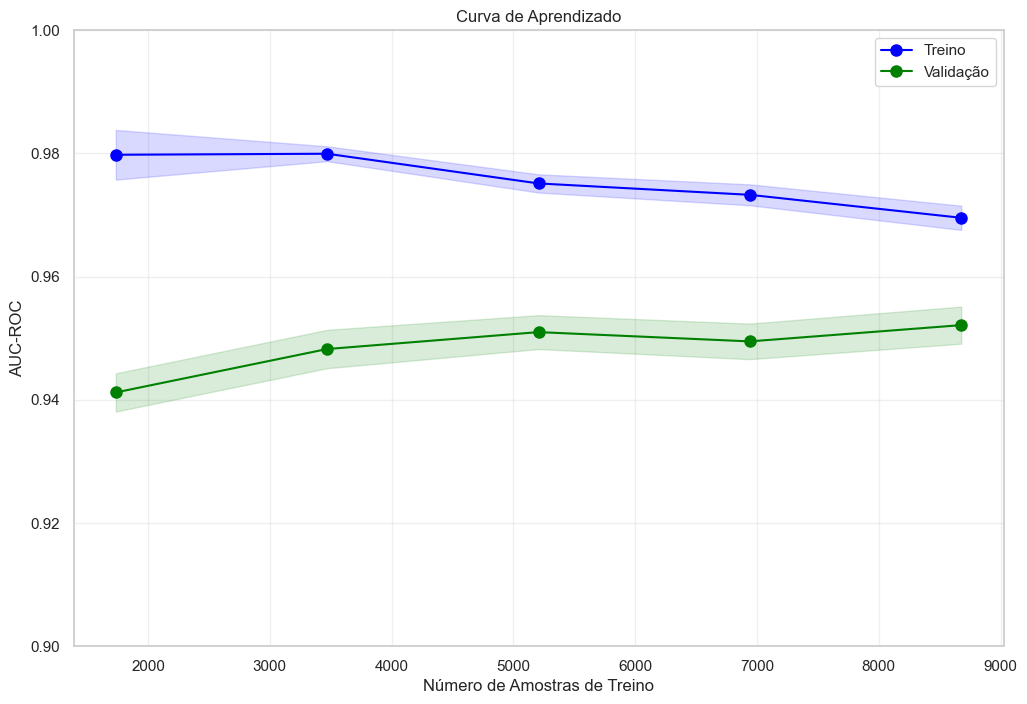

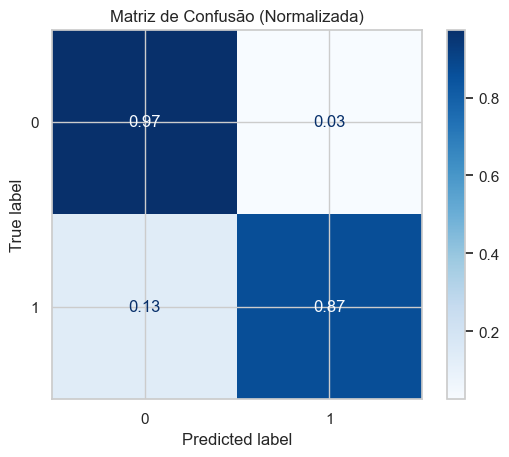

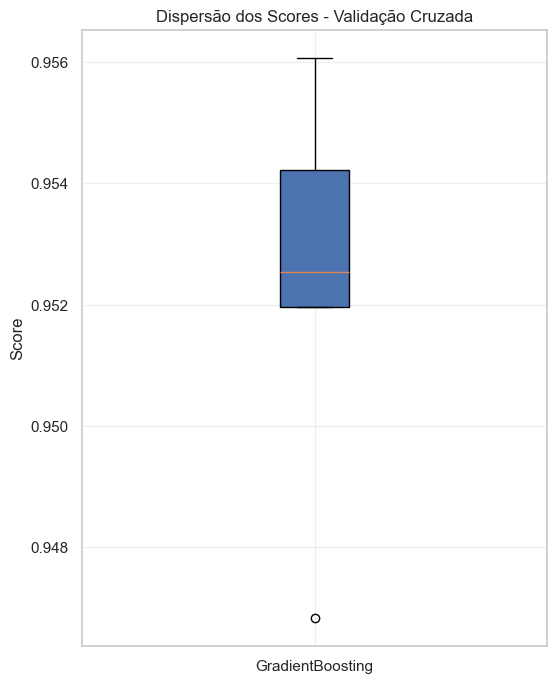

In [13]:
# Escolhendo o modelo com maior AUC no Holdout
modelo_escolhido_nome = max(resultados, key=lambda nome: resultados[nome]["auc_val"])

print(f"\nMelhor modelo na Validação (AUC): {modelo_escolhido_nome}")

# Carregando o modelo que foi treinado ou usando a instância já treinada
modelo_escolhido = modelos_treinados[modelo_escolhido_nome]

# Plota as curvas ROC para cada modelo utilizando o conjunto de validação
plot_roc_curves(modelos_list, modelos_nome, X_val, y_val)

# Plota em um único gráfico, as curvas de aprendizado dos modelos utilizando o conjunto de treino
plot_learning_curve(modelo_escolhido, X_train, y_train, cv=5, scoring='roc_auc')

# Plota a matriz de confusão normalizada para os modelos da lista utilizando o conjunto de validação
plot_confusion_matrix(modelo_escolhido, X_val, y_val, normalize=True)

# Plota os boxplots dos scores de validação cruzada para todos os modelos

cv_scores = cross_val_score(modelo_escolhido, X_train, y_train, cv=5, scoring='roc_auc')
plot_cv_boxplot(cv_scores, modelo_escolhido_nome)

### Interpretação dos Resultados:
Com os resultados obtidos, foi possível observar que os modelos de forma geral conseguiram apresentar um desempenho bem elevado, no entanto, quando se trata de termos de estabilidade e capacidade de discriminação entre as classes houve uma certa divergência.

Pela análise, os modelos de ensemble foram os que proporcionaram melhores resultados, em especial o  **Gradient Boosting** foi o que obteve as métricas mais altas, com acurácia, precisão, recall e F1-Score beirando o máximo possível, além de obter uma AUC-ROC de 0.9500, sendo a mais alta obtida. Com essa performance, podemos concluir que o melhor modelo do projeto foi o **Gradient Boosting** possuindo uma ótima capacidade de distinguir entre pacientes normais e anormais, crucial para a detecção de cardiopatias em crianças.

---
## <a id="escolha-do-modelo-final-e-geracao-da-submissao"></a>Escolha do Modelo Final e Geração da Submissão

Com base na análise dos resultados obtida, selecionamos o modelo que apresenta o melhor desempenho considerando especialmente a **área sobre a curva ROC**. Com base nessa avaliação, selecionamos e treinamos o modelo final que melhor equilibra a capacidade de distinguir entre classes, refletindo sua capacidade de detectar corretamente os pacientes com patologias cardíacas, que conforme explicitamos acima foi o Random Forest. Geramos, por fim, as previsões para o conjunto de teste, preparando o arquivo de submissão conforme as exigências da competição no Kaggle.

In [14]:

X_test = X_test.reindex(columns=X.columns, fill_value=0)

y_pred_test = modelo_escolhido.predict_proba(X_test)[:, 1]

df_sample_submission['Predicted'] = y_pred_test
df_sample_submission.to_csv('submissao_final.csv', index=False, float_format='%.6f')
print('Arquivo de submissão gerado: submissao_final.csv')

Arquivo de submissão gerado: submissao_final.csv
